# Question 4: Data Streams
First import libraries we will be using in this question.

In [1]:
import math
import matplotlib.pyplot as plt

Define general hash function from instructions, which creates a hash function with parameters $a$, $b$, $p$ and $n_{buckets}$. It returns $hash(x)$ for specified $x$.
Here the input of hash is $x = 1, 2, \dots n$, and the output is $hash (x) = 1, 2, \dots n_{buckets}$.  

In [2]:
def hash_fun(a, b, p, n_buckets, x):
    y = x % p
    hash_val = (a*y + b) % p
    return hash_val % n_buckets + 1

Define parameters $p$, $\delta$ and $\epsilon$. From $\epsilon$ derive $n_{buckets} = \lceil \frac{e}{\epsilon} \rceil $.

In [3]:
p = 123457
delta = math.e**(-5)
epsilon = math.e * 10**(-4)
n_buckets = math.ceil(math.e / epsilon)

Import hash_params.txt to obtain parameters $a$ and $b$ to define hash functions.

In [4]:
params_file = open("data/hash_params.txt", "r")
params = [(int(y[0]), int(y[1])) for y in [x.split("\t") for x in params_file.read().split("\n")][:-1]]

## Implementation on tiny files

Import words_stream_tiny.txt and counts_tiny.txt. Here words_stream_tiny.txt is a file in which each line represents an ID of a word. We will be using hash functions defined with $hash\_fun$ to get the count $c_{j, h_j (i)}$ for each $j = 1, \dots 5$ and each $i = 1, \dots n$, where $n$ is the number of distinct words.
Taking the minimum of all $c_{j, h_j (i)}$ will be $\tilde{F} [i]$. We will compare this value to the actual count of each word, $F [i]$, which we will get from counts_tiny.txt.

In [5]:
counts_tiny_file = open("data/counts_tiny.txt", "r")
counts_tiny = dict([(int(y[0]), int(y[1])) for y in [x.split("\t") for x in counts_tiny_file.read().split("\n")][:-1]])

In [6]:
stream_tiny_file = open("data/words_stream_tiny.txt", "r")
stream_tiny = [int(x) for x in stream_tiny_file.read().split("\n")]

For every pair of parameters $a$ and $b$ map the stream with hash function with parameters $a$, $b$, $p$ and $n_{buckets}$. for each create a dictionary in which we save count of every element in hashed list. Then save this dictionary for further comparation.

In [7]:
F_list_tiny = []

for a,b in params:
    hash_stream_tiny = list(map(lambda x: hash_fun(a, b, p, n_buckets, x), stream_tiny))

    F_dict_tiny = dict()
    for x in hash_stream_tiny:
        if x in F_dict_tiny.keys():
            F_dict_tiny[x] += 1
        else:
            F_dict_tiny[x] = 1
    
    F_list_tiny.append(F_dict_tiny)

In [8]:
F_tiny = dict()
for word in range(1, 1 + max(stream_tiny)):

    c_min = math.inf
    for j, (a, b) in list(enumerate(params)):
        x = hash_fun(a, b, p, n_buckets, word)
        c = F_list_tiny[j][x]

        if c < c_min:
            c_min = c

    F_tiny[word] = c_min

In [9]:
# check property F_tiny (i) >= counts_tiny (i) for every i = 1 ... n
for i in range(1, 139040):
    if  F_tiny[i] < counts_tiny[i]:
        print(i)

Define the error function $E_r [i] = \frac{\tilde{F} [i] - F[i]}{F[i]}$.

In [10]:
def error(tilde_F, F, i):
    return (tilde_F[i] - F[i]) / F[i]

In [11]:
y_axis_tiny = list(map(lambda x: error(F_tiny, counts_tiny, x), range(1, 1 + max(stream_tiny))))

Define function that calculates exact word frequency.

In [12]:
def word_freqency(F, i, t):
    return F[i] / t

In [13]:
x_axis_tiny = list(map(lambda x: word_freqency(counts_tiny, x, len(stream_tiny)), range(1, 1 + max(stream_tiny))))

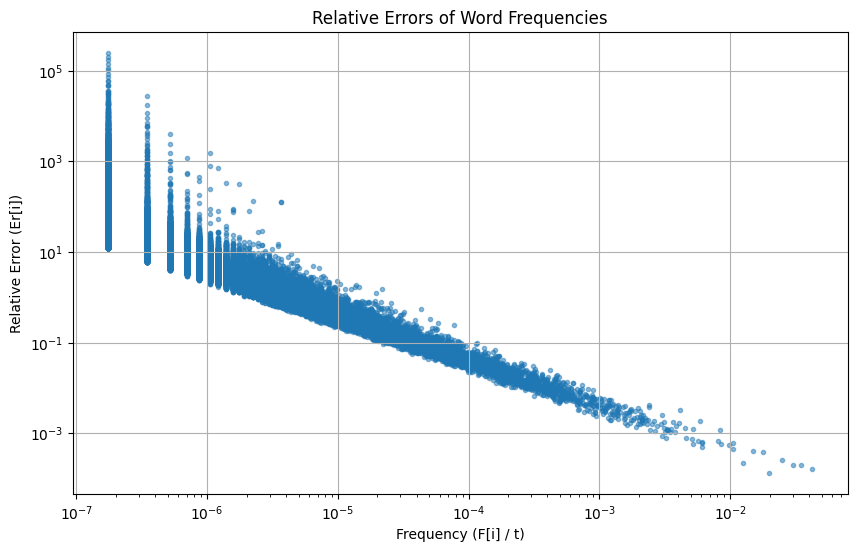

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x_axis_tiny, y_axis_tiny, marker='.', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Relative Errors of Word Frequencies')
plt.xlabel('Frequency (F[i] / t)')
plt.ylabel('Relative Error (Er[i])')
plt.grid(True)
plt.show()

## Main implementation

Import words_stream.txt and counts.txt. Here words_stream.txt is a file in which each line represents an ID of a word. We will be using hash functions defined with $hash\_fun$ to get the count $c_{j, h_j (i)}$ for each $j = 1, \dots 5$ and each $i = 1, \dots n$, where $n$ is the number of distinct words.
Taking the minimum of all $c_{j, h_j (i)}$ will be $\tilde{F} [i]$. We will compare this value to the actual count of each word, $F [i]$, which we will get from counts.txt.

In [15]:
counts_file = open("data/counts.txt", "r")
counts = dict([(int(y[0]), int(y[1])) for y in [x.split("\t") for x in counts_file.read().split("\n")][:-1]])

stream_file = open("data/words_stream.txt", "r")
stream = [int(x) for x in stream_file.read().split("\n")[:-1]]

For every pair of parameters $a$ and $b$ map the stream with hash function with parameters $a$, $b$, $p$ and $n_{buckets}$. for each create a dictionary in which we save count of every element in hashed list. Then save this dictionary for further comparation.

In [16]:
F_list = []

for a,b in params:
    hash_stream = list(map(lambda x: hash_fun(a, b, p, n_buckets, x), stream))

    F_dict = dict()
    for x in hash_stream:
        if x in F_dict.keys():
            F_dict[x] += 1
        else:
            F_dict[x] = 1
    
    F_list.append(F_dict)

In [17]:
F = dict()
for word in range(1, 1 + max(stream)):

    c_min = math.inf
    for j, (a, b) in list(enumerate(params)):
        x = hash_fun(a, b, p, n_buckets, word)
        c = F_list[j][x]

        if c < c_min:
            c_min = c

    F[word] = c_min

Define the error function $E_r [i] = \frac{\tilde{F} [i] - F[i]}{F[i]}$.

In [18]:
def error(tilde_F, F, i):
    return (tilde_F[i] - F[i]) / F[i]

y_axis = list(map(lambda x: error(F, counts, x), range(1, 1 + max(stream))))

Define function that calculates exact word frequency.

In [19]:
def word_freqency(F, i, t):
    return F[i] / t

x_axis = list(map(lambda x: word_freqency(counts, x, len(stream)), range(1, 1 + max(stream))))

Plot the errors depending on actual frequencies of the words.

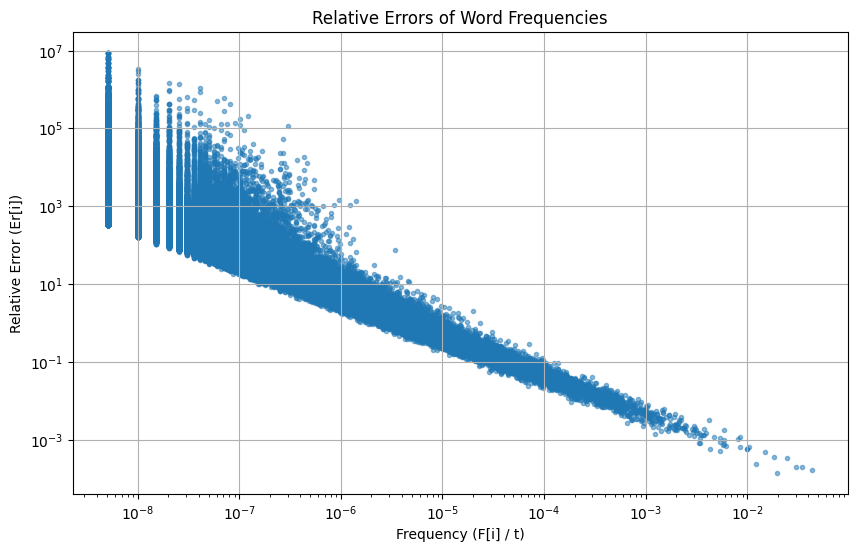

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis, marker='.', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Relative Errors of Word Frequencies')
plt.xlabel('Frequency (F[i] / t)')
plt.ylabel('Relative Error (Er[i])')
plt.grid(True)
plt.savefig("plot.png")